## 计算

调用calculate_real_from_csv()计算策略之前协方差。

调用A5_matrix_X()计算A5矩阵的实耦合。参数a = [-4.236,-0.618,0.234,1.618,4.236]，mode_col = A5_mode_1 或A5_mode_2

计算两种模式实耦合与协方差之间的相关系数

In [1]:
import pandas as pd
from calculate import *
from from_eigenvector_out_XY import *

#A5 = Matrix([[0, a, 1, -1, -a],
#             [-a, 0, a, 1, -1],
#             [-1, -a, 0, a, 1],
#             [1, -1, -a, 0, a],
#             [a, 1, -1, -a, 0]])



#the value for a , support in range[-4.236,-0.618,0.234,1.618,4.236]
A5_a_value_list = [-4.236,-0.618,0.234,1.618,4.236]

#the column number of eigenvector matrix
A5_mode_1 = 2
A5_mode_2 = 3

#the start for calculating , The data before the start_round will be truncated when calculating
start_round = 1000



for i in A5_a_value_list:
    A5_a_value = i
    result = pd.DataFrame()
#the csv file path
    A5_csv_name = '.\\data\\A5_'+(str)(A5_a_value)+'_Strategy_distributions.csv'

#calculate_real_from_csv(csv_name,start_round):
    sum_lst = calculate_real_from_csv(A5_csv_name,start_round)
#print("csv result :",sum_lst)

#A5_matrix_X(a_value,mode_col):
    xmn1 = A5_matrix_X(A5_a_value,A5_mode_1)
#print("eigen vector mode1 result :",xmn1)

    xmn2 = A5_matrix_X(A5_a_value,A5_mode_2)
#print("eigen vector mode2 result :",xmn2)

#calculate the correlation coefficient
    data = pd.DataFrame()
    data['A'] = sum_lst
    data['B']=xmn1
    cor1 = data.A.corr(data.B)
    data['C']=xmn2
    cor2 = data.A.corr(data.C)
    result[(str)(A5_a_value) + '_from_csv'] = sum_lst
    result[(str)(A5_a_value) + '_mode1'] = xmn1
    result[(str)(A5_a_value) + '_mode2'] = xmn2
#print("the correlation coefficient of mode 1 is :" ,cor1)
#print("the correlation coefficient of mode 2 is :" ,cor2)
    result.to_csv('.\\result\\A5_' + (str)(A5_a_value) + '_result.csv')


## 数据分析

对数据进行二元线性回归分析

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm


#the value for a , support in range[-4.236,-0.618,0.234,1.618,4.236]
A5_a_value = 0.234
result_csv_name = '.\\result\\A5_' + (str)(A5_a_value) + '_result.csv'
data = pd.read_csv(result_csv_name)


x = sm.add_constant(data.iloc[:,2:]) #生成自变量
y = data[(str)(A5_a_value) + '_from_csv'] #生成因变量
model = sm.OLS(y, x) #生成模型
res = model.fit() #模型拟合
print(res.summary()) #模型描述


                            OLS Regression Results                            
Dep. Variable:         0.234_from_csv   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     67.59
Date:                Sun, 07 May 2023   Prob (F-statistic):           2.94e-07
Time:                        22:47:48   Log-Likelihood:                 122.92
No. Observations:                  15   AIC:                            -239.8
Df Residuals:                      12   BIC:                            -237.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         3.93e-18      2e-05   1.96e-13      

d:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## 图像绘制

绘制二元线性回归图像

[ 1.  1. -2.  1. -1.  1.]
[ 1.26433288 -0.56158142  0.53693056]


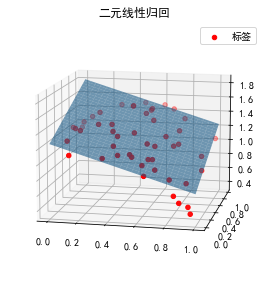

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import lstsq
plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 1. 造50对数据
np.random.seed(0)
x_1 = np.random.rand(50).reshape(50, -1)
x_2 = np.random.rand(50).reshape(50, -1)
y_t = 1 + x_1 + -2 * x_1 ** 2 + x_2 + -1 * x_2 ** 2 + x_1*x_2  # + np.random.rand(50).reshape(50, -1) / 3

# 2. 尝试求解 以及 可视化
fig = plt.figure(figsize=(10, 5))
m = np.ones(x_1.shape)
m = np.hstack((m, x_1, x_1 ** 2, x_2, x_2 ** 2, x_1*x_2))
k = lstsq(m, y_t, rcond=None)[0].reshape(-1)
print(k)


# 3. 增加一个对比 二元线性回归
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.scatter(x_1.reshape(-1), x_2.reshape(-1), y_t.reshape(-1), c='red', s=20, label='标签')
m = np.ones(x_1.shape)
m = np.hstack((m, x_1, x_2))
k = lstsq(m, y_t, rcond=None)[0].reshape(-1)
print(k)
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
x, y =np.meshgrid(x1, x2)
z = k[0] + k[1] * x + k[2] * y
ax.plot_surface(x, y, z,rstride=4,cstride=4,alpha=0.6)
ax.legend()
ax.set_title('二元线性归回')
ax.view_init(12,-78)

plt.show()
